In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cu113.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cu113.html
     |████████████████████████████████| 7.9 MB 2.7 MB/s 
     |████████████████████████████████| 3.5 MB 43.0 MB/s 
     |████████████████████████████████| 2.4 MB 43.7 MB/s 
     |████████████████████████████████| 709 kB 52.6 MB/s 
     |████████████████████████████████| 467 kB 5.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=125a1c38b28519e61a9a55db76f0fabb5b2719a99036e667005b2e0aba1c6077
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Label IDs of product categories
data2 = pd.read_csv("drive/MyDrive/products/mapping/labelidx2productcategory.csv")
data2

,label idx,product category
0,0,Home & Kitchen
1,1,Health & Personal Care
2,2,Beauty
3,3,Sports & Outdoors
4,4,Books
5,5,"Patio, Lawn & Garden"
6,6,Toys & Games
7,7,CDs & Vinyl
8,8,Cell Phones & Accessories
9,9,Grocery & Gourmet Food


In [ ]:
#Node labels of each node
data3 = pd.read_csv("drive/MyDrive/products/raw/node-label.csv", header = None)
data3.columns = ["node_label"]
data3.insert(0, 'node_num', range(0, len(data3)))
data3

,node_num,node_label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,3
...,...,...
2449024,2449024,7
2449025,2449025,9
2449026,2449026,8
2449027,2449027,2


In [ ]:
#Choosing only selected labelled nodes
df = data3.loc[data3['node_label'].isin([0, 5, 21, 25, 26, 37])]
df

,node_num,node_label
0,0,0
6,6,5
19,19,0
20,20,5
24,24,0
...,...,...
2448967,2448967,0
2448968,2448968,5
2448973,2448973,5
2448981,2448981,0


In [ ]:
edge = pd.read_csv("drive/MyDrive/products/raw/edge.csv", header = None)

In [ ]:
#Choosing edges present only between selected nodes
edge = edge.loc[(edge[0].isin(df['node_num'])) & (edge[1].isin(df['node_num']))]
edge

,0,1
0,0,152857
1,0,32104
2,0,23158
3,0,228358
4,0,115556
...,...,...
61858927,1813973,2449013
61858929,1635354,2449013
61858930,1848217,2449013
61858931,803150,2449013


In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
G.add_nodes_from(df['node_num'])

In [ ]:
G.number_of_nodes()

239895

In [ ]:
for i in range(len(edge)):
  G.add_edge(edge.iloc[i, 0], edge.iloc[i, 1])

In [ ]:
G.number_of_edges()

5183954

In [ ]:
#Removing nodes with very less number of edges
deg0 = []
for node in G.nodes:
    if G.degree[node] < 11:
      deg0.append(node)


In [ ]:
len(deg0)

66738

In [ ]:
G.remove_nodes_from(deg0)

In [ ]:
G.number_of_nodes()

173157

In [ ]:
G.number_of_edges()

4913889

In [ ]:
#Final list of nodes
data3 = data3.loc[data3['node_num'].isin(G.nodes)]
data3

,node_num,node_label
0,0,0
6,6,5
19,19,0
20,20,5
24,24,0
...,...,...
2448963,2448963,21
2448968,2448968,5
2448973,2448973,5
2448981,2448981,0


In [ ]:
#Features of selected nodes
data = pd.read_csv("drive/MyDrive/products/raw/node-feat.csv", header = None)
data.insert(0, 'node_num', range(0, len(data)))
data = data.loc[data['node_num'].isin(G.nodes)].reset_index(drop=True)
data['index'] = data.index
data

,node_num,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,index
0,0,0.031933,-0.195860,0.051996,-0.063349,-0.229868,-0.022130,0.404647,-0.107936,0.032562,...,-0.183108,0.500978,0.402239,0.112249,-0.112690,0.141763,0.076696,-0.392954,-0.064784,0
1,6,-3.851406,0.915849,0.588583,-2.869881,-0.301050,-0.707760,-2.860423,0.595760,-3.044590,...,6.216569,4.410612,-5.241060,4.707540,4.065494,1.922849,3.792605,-2.005674,0.171979,1
2,19,-0.715686,1.180091,0.111302,0.394790,1.037178,1.253486,-1.850752,-0.083145,0.640193,...,1.324988,0.209121,3.656727,-1.831174,-0.398345,1.039561,2.282994,-0.538023,3.674456,2
3,20,-0.140458,1.343894,0.080991,0.484580,-0.219147,-0.362791,-1.492277,-0.323455,-0.237857,...,-0.385152,-0.596324,0.394384,-1.090209,0.279572,-0.144612,0.108497,0.873693,0.392959,3
4,24,0.221811,1.540453,-0.001421,0.802195,0.488764,-0.317437,-0.378551,0.490133,-0.941972,...,-1.339434,-0.297577,1.096097,-1.305360,0.181421,0.843075,0.652916,0.328412,0.433156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173152,2448963,0.358706,0.410029,0.196196,-0.730708,1.228394,-1.913394,-0.330679,-0.395353,-0.454272,...,0.167444,0.998879,1.386599,-0.458722,-0.563959,-0.753562,0.239545,0.346644,-0.134271,173152
173153,2448968,0.304233,0.759097,-0.513060,-0.432246,-0.388382,-0.258686,0.685835,-0.088163,0.282214,...,1.445606,1.209313,2.522159,-0.521700,-0.897451,-0.468812,0.325189,0.184048,1.260547,173153
173154,2448973,-0.112693,-0.071612,0.317602,-0.124570,0.377091,-0.125700,-0.445868,0.236665,-0.621705,...,-0.527512,0.157386,0.084159,0.405155,-0.034151,0.242779,-0.310291,0.159632,0.403024,173154
173155,2448981,0.397849,0.531577,0.690831,-0.407610,0.873174,-0.792346,-0.239473,0.220130,0.079579,...,-0.252390,0.680471,1.196611,-0.450480,-1.109205,0.393501,-0.912733,0.445742,1.473751,173155


In [ ]:
x = data.iloc[:, 1:-1].to_numpy()
x.shape

(173157, 100)

In [ ]:
#Renaming labels in the dataset
dct = {0: 0, 5: 1, 21: 2, 25: 3, 26: 4, 37: 5}
data3 = data3.replace({"node_label": dct})
data3

,node_num,node_label
0,0,0
6,6,1
19,19,0
20,20,1
24,24,0
...,...,...
2448963,2448963,2
2448968,2448968,1
2448973,2448973,1
2448981,2448981,0


In [ ]:
y = data3["node_label"].to_numpy()
y.shape

(173157,)

In [ ]:
edge

,0,1
0,0,152857
1,0,32104
2,0,23158
3,0,228358
4,0,115556
...,...,...
61858927,1813973,2449013
61858929,1635354,2449013
61858930,1848217,2449013
61858931,803150,2449013


In [ ]:
#creating edge index
edge[0] = edge[0].map(data.set_index('node_num')['index'])
edge[1] = edge[1].map(data.set_index('node_num')['index'])
edge = edge.dropna()
edge = edge.reset_index(drop=True)
edge[0] = edge[0].astype(int)
edge[1] = edge[1].astype(int)
edge

,0,1
0,0,12756
1,0,2690
2,0,1935
3,0,19067
4,0,9605
...,...,...
4913884,128843,173156
4913885,116454,173156
4913886,131255,173156
4913887,58809,173156


In [ ]:
edge_index = edge.to_numpy().transpose()
edge_index.shape

(2, 4913889)

In [ ]:
#Splitting dataset into train and test set 
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter

stratSplit = StratifiedShuffleSplit(test_size=0.3, random_state=42)
stratSplit.get_n_splits(x, y)

for train_idx, test_idx in stratSplit.split(x, y):

    train_x = x[train_idx]
    train_y = y[train_idx]
    
    val_x = x[test_idx]
    val_y = y[test_idx]


print(Counter(train_y))
print(Counter(val_y))

Counter({0: 60531, 2: 34518, 1: 24330, 3: 1404, 4: 256, 5: 170})
Counter({0: 25943, 2: 14794, 1: 10427, 3: 601, 4: 110, 5: 73})


# **Model**

In [ ]:
## GNN Model:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels,num_features,num_classes):
        super(GCN , self).__init__()
        torch.manual_seed(42)
        
        self.gcn1=GCNConv(num_features , hidden_channels)
        self.gcn2=GCNConv(hidden_channels , hidden_channels)
        self.linear = Linear(hidden_channels, num_classes)
         
    
    def forward(self , x , edge_index):
        
        x = F.normalize(x)
                      
        x = self.gcn1(x , edge_index)
        x = x.relu()
        x = F.dropout(x , p=0.5, training = self.training)
        
        x = self.gcn2(x , edge_index)
        x = x.relu()
        x = F.dropout(x , p=0.5 , training = self.training)

        x = F.softmax(self.linear(x), dim=1)
        return x
    

device='cuda:0' if torch.cuda.is_available() else 'cpu'
model = GCN(hidden_channels = 32, num_features = 100, num_classes = 6)
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters : {num_params}")

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()

model

Number of parameters : 4486


GCN(
  (gcn1): GCNConv(100, 32)
  (gcn2): GCNConv(32, 32)
  (linear): Linear(in_features=32, out_features=6, bias=True)
)

In [ ]:
#Changing numpy arrays to tensors in PyTorch
x = torch.from_numpy(x)
x = x.to(device)
y = torch.from_numpy(y)
y = y.to(device)

train_x = torch.from_numpy(train_x)
train_x = train_x.to(device)
train_y = torch.from_numpy(train_y)
train_y = train_y.to(device)

val_x = torch.from_numpy(val_x)
val_x = val_x.to(device)
val_y = torch.from_numpy(val_y)
val_y = val_y.to(device)

edge_index = torch.from_numpy(edge_index)
edge_index = edge_index.to(device)

In [ ]:
def accuracy(pred, target):
    return (pred == target).sum().item() / target.numel()

In [ ]:
def training (model, x, y, edge_index, max_epochs = 2000, early_stopping=100):
    
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    
    
    for epoch in range(max_epochs):

        # Training - 

        model.train()
        optimizer.zero_grad()

        out = model.forward(x.float() , edge_index)
        loss = criterion(out[train_idx], y[train_idx])
        loss.backward()
        optimizer.step()

        loss = loss.item()

        pred = out.argmax(dim=1)
        acc = accuracy(pred , y)

        train_loss.append(loss)
        train_acc.append(acc)

        # Validating -

        model.eval()
        out_val = out[test_idx]
        loss_val = criterion(out_val, val_y)

        loss_val = loss_val.item()

        pred_val = out_val.argmax(dim=1)        
        acc_val = accuracy(pred_val , val_y)

        val_loss.append(loss_val)
        val_acc.append(acc_val)


        if epoch % 100 == 0:

            print(f'Epoch: {epoch}, Train Loss: {loss}, Train Accuracy: {acc}')
            print(f'Epoch: {epoch}, Val Loss: {loss_val}, Val Accuracy: {acc_val}')
            torch.save(model.state_dict(), 'drive/MyDrive/products/model/model.pth')


        if epoch > early_stopping and loss_val > np.mean(val_loss[-(early_stopping + 1) : -1]):
            print("\nEarly stopping...")
            break

        

    torch.save(model.state_dict(), 'drive/MyDrive/products/model/model.pth')


    plt.figure(figsize =(20, 10))
    ax1 = plt.subplot(121)
    ax1.set_title("Loss")
    ax1.plot(train_loss, label="train")
    ax1.plot(val_loss, label="val")
    plt.xlabel("Epoch")
    ax1.legend()

    ax2 = plt.subplot(122)
    ax2.set_title("Accuracy")
    ax2.plot(train_acc, label="train")
    ax2.plot(val_acc, label="val")
    plt.xlabel("Epoch")
    ax2.legend()

    return train_loss,train_acc,val_loss,val_acc, pred_val , val_y

Epoch: 0, Train Loss: 1.7815994024276733, Train Accuracy: 0.2011411609117737
Epoch: 0, Val Loss: 1.7815569639205933, Val Accuracy: 0.2012974512974513
Epoch: 100, Train Loss: 1.4549877643585205, Train Accuracy: 0.5987860727547832
Epoch: 100, Val Loss: 1.4551337957382202, Val Accuracy: 0.5985985985985987
Epoch: 200, Train Loss: 1.2318259477615356, Train Accuracy: 0.8407976576170758
Epoch: 200, Val Loss: 1.2327412366867065, Val Accuracy: 0.8405520905520906
Epoch: 300, Train Loss: 1.177786946296692, Train Accuracy: 0.8787574282298724
Epoch: 300, Val Loss: 1.1787965297698975, Val Accuracy: 0.877993377993378
Epoch: 400, Train Loss: 1.1633247137069702, Train Accuracy: 0.88831522837656
Epoch: 400, Val Loss: 1.1638387441635132, Val Accuracy: 0.8882536382536382
Epoch: 500, Train Loss: 1.1557334661483765, Train Accuracy: 0.8937149523265013
Epoch: 500, Val Loss: 1.1559550762176514, Val Accuracy: 0.8936436436436437
Epoch: 600, Train Loss: 1.1495535373687744, Train Accuracy: 0.8987681699267139
Epoch

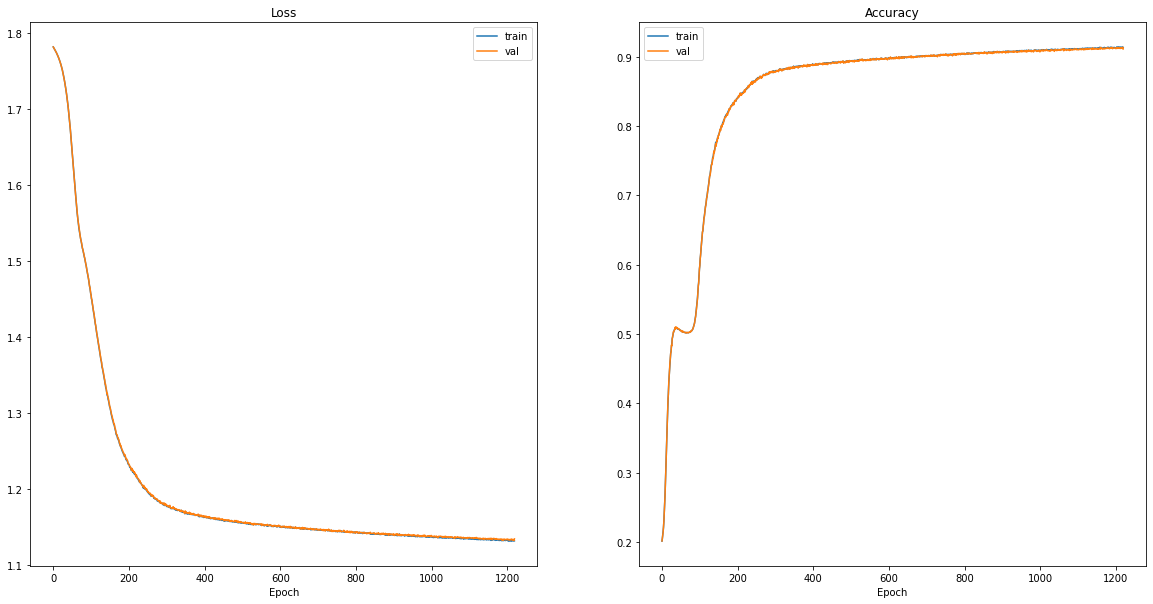

In [ ]:
train_loss,train_acc,val_loss,val_acc, pred_val , val_y = training(model, x, y, edge_index, max_epochs=2000, early_stopping=100)

In [ ]:
pred_val

tensor([0, 0, 0,  ..., 0, 2, 2], device='cuda:0')

In [ ]:
val_y

tensor([0, 0, 0,  ..., 0, 2, 2], device='cuda:0')

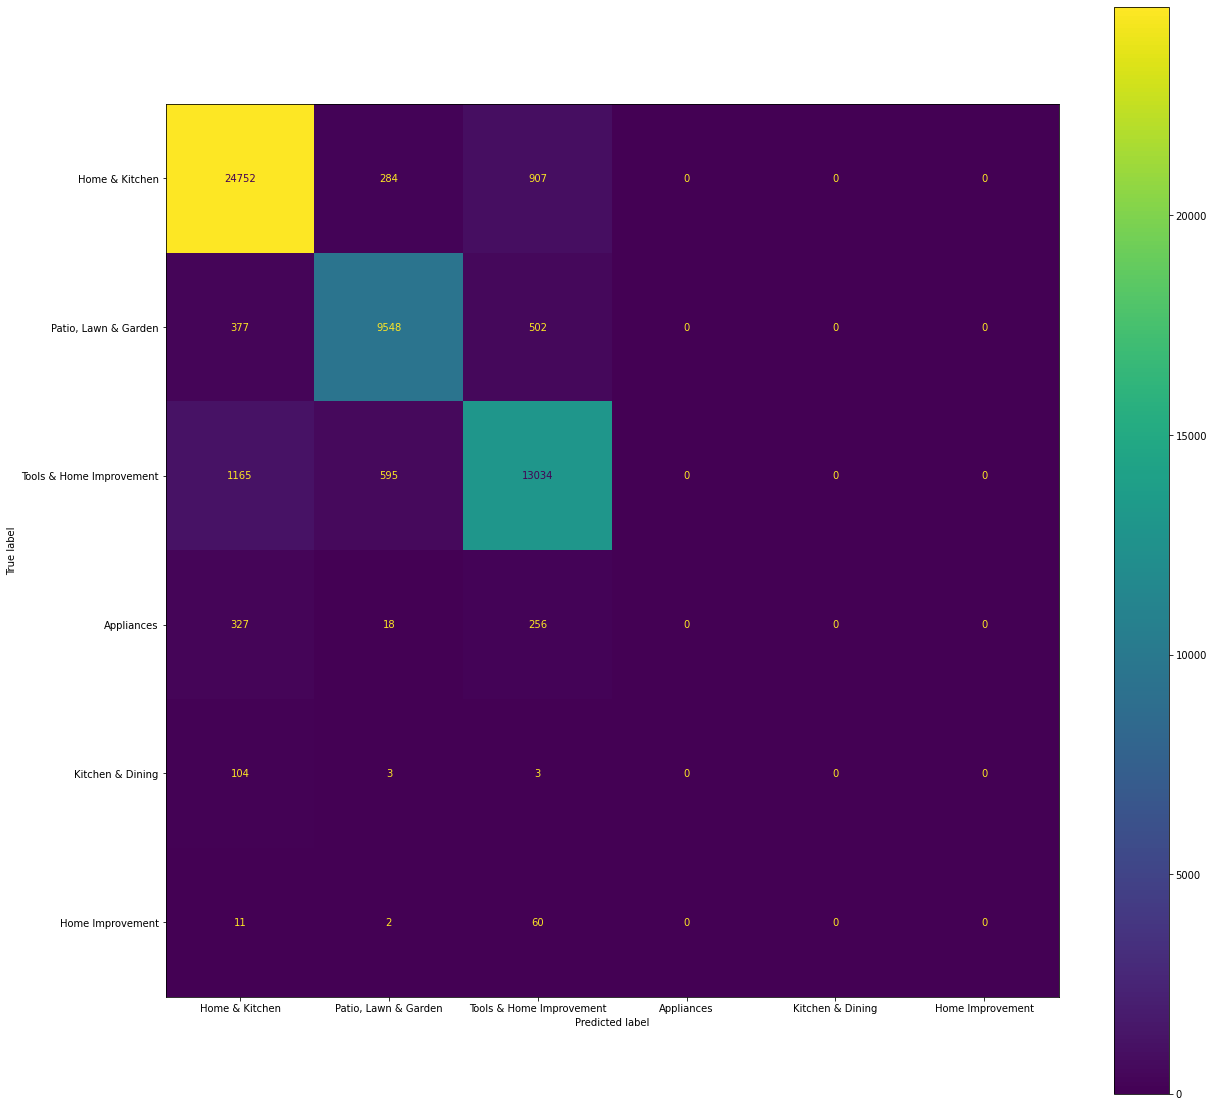

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(val_y.cpu(), pred_val.cpu())
disp = ConfusionMatrixDisplay(cm, display_labels = ['Home & Kitchen', 'Patio, Lawn & Garden', 'Tools & Home Improvement', 'Appliances', 'Kitchen & Dining', 'Home Improvement'])

fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)